In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import yfinance as yf

ms = yf.Ticker("MS")
jpm = yf.Ticker("JPM")
gs = yf.Ticker("GS")
hsbc = yf.Ticker("HSBC")

In [31]:
ms_hist = ms.history(period="10y")
jpm_hist = jpm.history(period="10y")
gs_hist = gs.history(period="10y")
hsbc_hist = hsbc.history(period="10y")

In [32]:
ms_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-11-13 00:00:00-05:00,27.491208,27.552217,27.155672,27.331066,7376600,0.0,0.0
2014-11-14 00:00:00-05:00,27.361572,27.521714,27.155673,27.216679,7219100,0.0,0.0
2014-11-17 00:00:00-05:00,27.064147,27.285295,27.010764,27.148029,6208700,0.0,0.0
2014-11-18 00:00:00-05:00,27.193795,27.308184,27.048904,27.048904,5319600,0.0,0.0
2014-11-19 00:00:00-05:00,26.972645,27.155667,26.812503,27.056530,5748700,0.0,0.0


In [33]:
stock_list = [ms_hist,jpm_hist,gs_hist,hsbc_hist]
name_list = ['MS', 'JPM', 'GS','HSBC']

In [34]:
for i,hist in enumerate(stock_list):
  print(f"sum of null values in {name_list[i]}: \n{hist.isna().sum()}")

sum of null values in MS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in JPM: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in GS: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
sum of null values in HSBC: 
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [35]:
for i,hist in enumerate(stock_list):
  print(f"sum of duplicate values in {name_list[i]}: \n{hist.duplicated().sum()}")

sum of duplicate values in MS: 
0
sum of duplicate values in JPM: 
0
sum of duplicate values in GS: 
0
sum of duplicate values in HSBC: 
0


In [36]:
for i,hist in enumerate(stock_list):
  print(f"Describe {name_list[i]}: \n{hist.describe()}")

Describe MS: 
              Open         High          Low        Close        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     53.710351    54.308656    53.125087    53.718173  1.024741e+07   
std      25.749040    26.018742    25.496282    25.762030  5.092896e+06   
min      16.881697    17.240052    16.484389    16.897278  2.087800e+06   
25%      34.005937    34.351186    33.552144    33.960337  6.920050e+06   
50%      42.211272    42.634898    41.744561    42.174135  8.987150e+06   
75%      79.607420    80.423843    78.756448    79.485064  1.209528e+07   
max     133.190002   133.990005   131.710007   133.520004  5.853350e+07   

         Dividends  Stock Splits  
count  2516.000000        2516.0  
mean      0.007075           0.0  
std       0.065258           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       0.925000           0

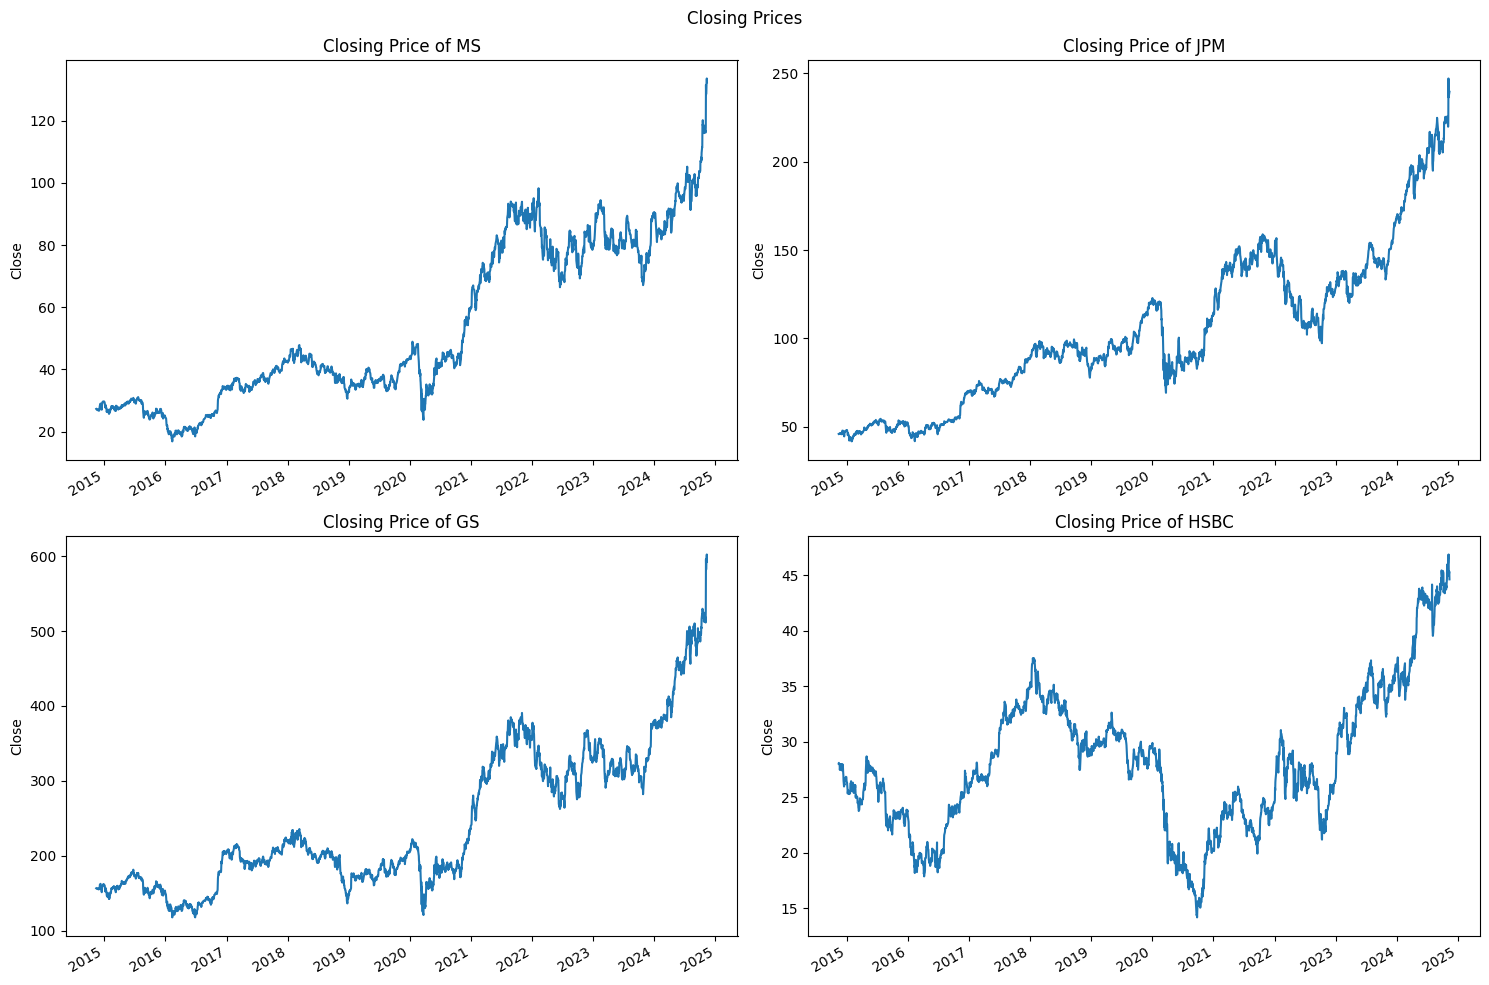

In [40]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name_list[i-1]}")
plt.suptitle("Closing Prices")
plt.tight_layout()

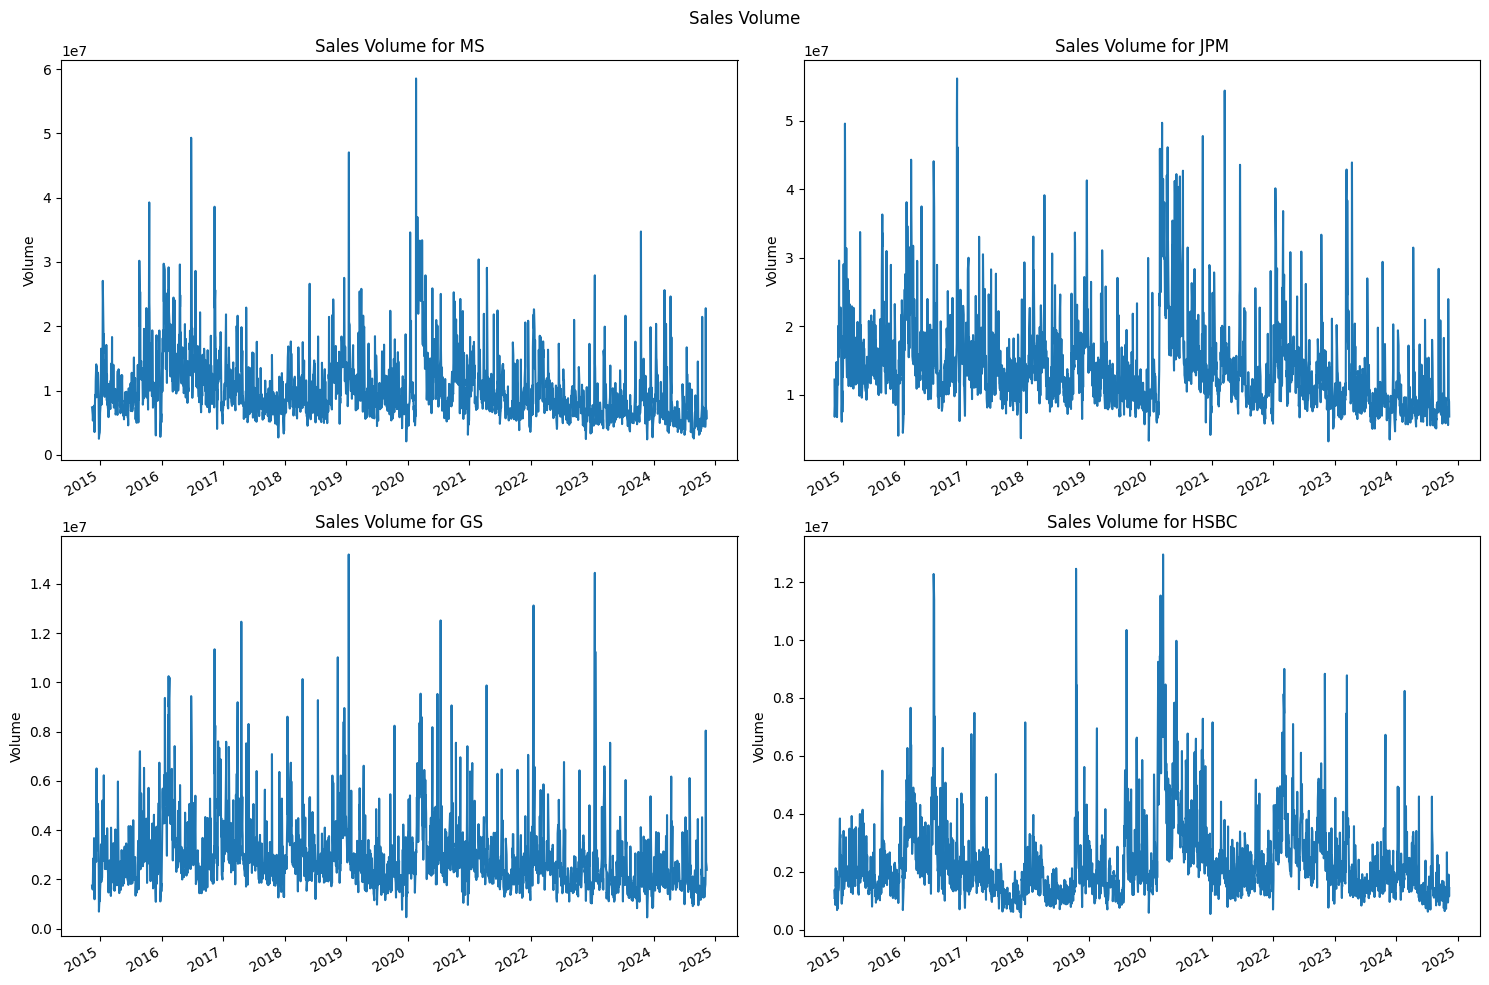

In [42]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name_list[i - 1]}")

plt.suptitle('Sales Volume')
plt.tight_layout()

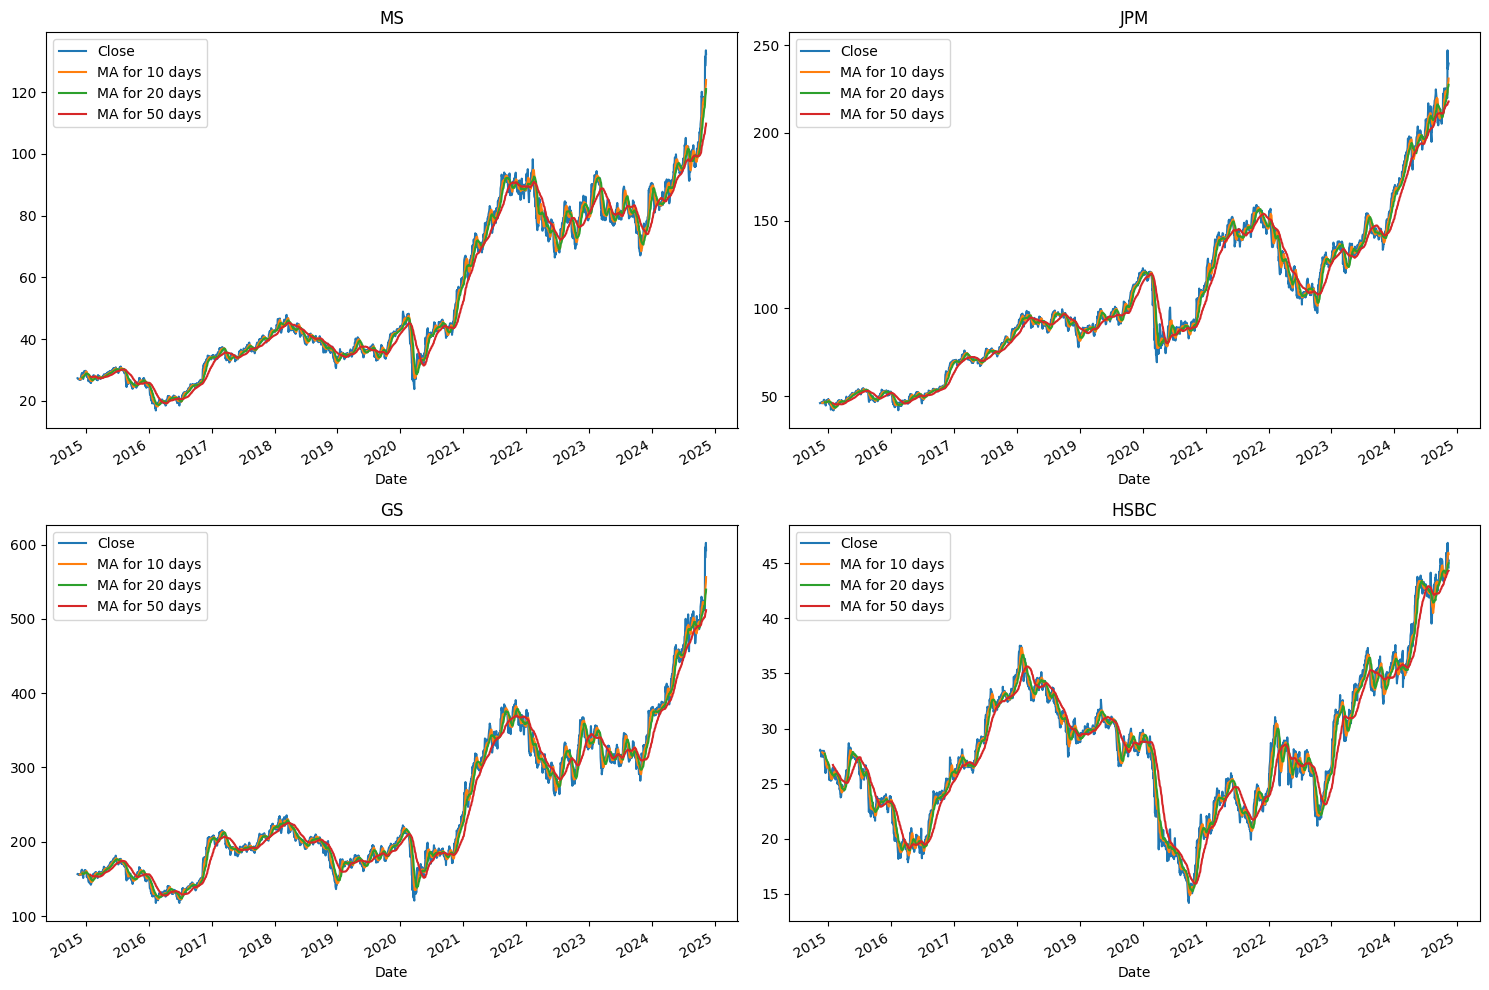

In [45]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stock_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ms_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MS')

jpm_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JPM')

gs_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GS')

hsbc_hist[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HSBC')

fig.tight_layout()

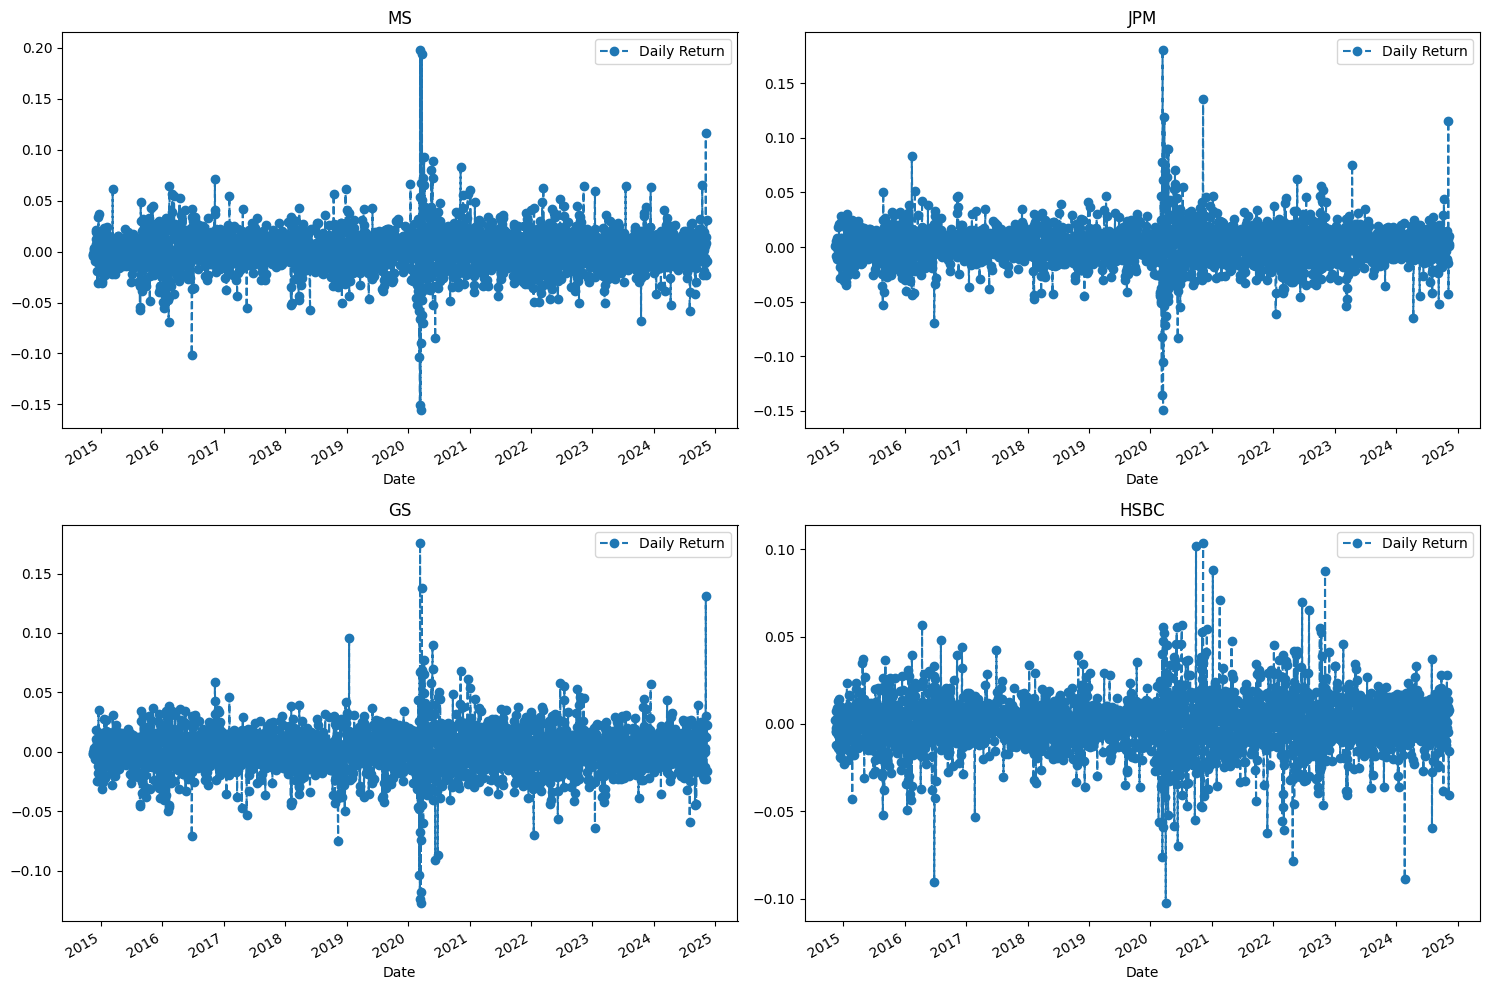

In [47]:
# We'll use pct_change to find the percent change for each day
for company in stock_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ms_hist['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MS')

jpm_hist['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('JPM')

gs_hist['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GS')

hsbc_hist['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HSBC')

fig.tight_layout()

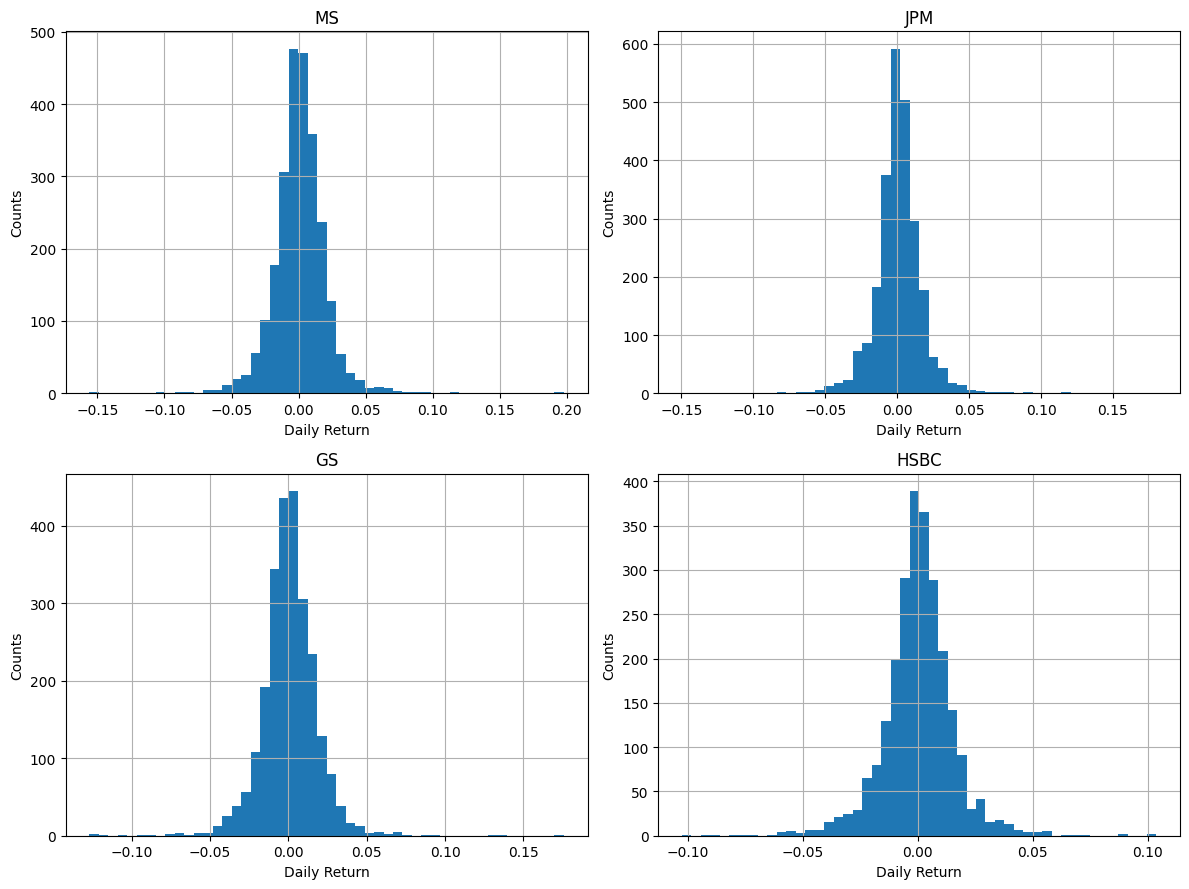

In [48]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{name_list[i - 1]}')

plt.tight_layout()

In [52]:
ms_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

In [260]:
dataset = ms_hist[['Close','Open','High', 'Low']]
model_data = pd.DataFrame(dataset)

model_data = model_data.values

In [261]:
from sklearn.preprocessing import MinMaxScaler

In [262]:
scaler = MinMaxScaler()
model_data = scaler.fit_transform(model_data)

In [263]:
timestep = 60

In [264]:
train_size = int(len(model_data)*.8)
test_size = len(ms_hist)-train_size

print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2012 Test Size : 504


In [265]:
train_data = model_data[:train_size,:]
test_data = model_data[train_size-timestep:,:]

In [266]:
train_data.shape, test_data.shape

((2012, 4), (564, 4))

In [267]:
sequence_length = 60

In [268]:
x_train = []
y_train = []

for i in range(len(train_data)-timestep):
    x_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length, 0])


x_train,y_train = np.array(x_train),np.array(y_train)

In [269]:
y_train.shape

(1952,)

In [270]:
x_test = []
y_test = []

for i in range(len(test_data)-timestep):
    x_test.append(test_data[i:i + sequence_length])
    y_test.append(test_data[i + sequence_length, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [271]:
y_train

array([0.09361993, 0.09709555, 0.09630858, ..., 0.53665373, 0.53434397,
       0.51976845])

In [272]:
x_test.shape,y_test.shape

((504, 60, 4), (504,))

In [273]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM,Dense,Dropout,BatchNormalization,GRU

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [278]:
model = Sequential([
    GRU(150, return_sequences= False, input_shape= (x_train.shape[1], 4)),
    Dropout(0.4),
    Dense(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mean_absolute_error','r2_score','root_mean_squared_error'])

In [279]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                         │ (None, 150)                 │          70,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,929 (312.22 KB)

 Trainable params: 79,929 (312.22 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 25, batch_size= 16 , callbacks= callbacks )

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0600 - r2_score: 0.6916 - root_mean_squared_error: 0.0923
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0019 - mean_absolute_error: 0.0282 - r2_score: 0.9416 - root_mean_squared_error: 0.0430
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0014 - mean_absolute_error: 0.0252 - r2_score: 0.9566 - root_mean_squared_error: 0.0372
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0232 - r2_score: 0.9644 - root_mean_squared_error: 0.0343
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 8.1335e-04 - mean_absolute_error: 0.0187 - r2_score: 0.9745 - root_mean_squared_error: 0.0285
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0011 - mean_absolute_error: 0.0233 - r2_score: 0.9655 - root_mean_squared_error: 0.0333
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 7.3093e-04 - mean_absolute_

In [283]:
predicted_prices = model.predict(x_test)

predicted_prices = predicted_prices.reshape(-1, 1)

num_samples = predicted_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
predicted_full = np.concatenate((dummy_features, predicted_prices), axis=1)
predicted_prices_inversed = scaler.inverse_transform(predicted_full)[:, -1]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [284]:
original_prices = y_test.reshape(-1, 1)

num_samples = original_prices.shape[0]
dummy_features = np.zeros((num_samples, 3))
original_full = np.concatenate((dummy_features, original_prices), axis=1)
original_prices_inversed = scaler.inverse_transform(original_full)[:, -1]

RMSE = np.sqrt(np.mean( original_prices_inversed - predicted_prices_inversed )**2).round(2)
print(f"Root mean squared error:{RMSE}")

Root mean squared error:0.74


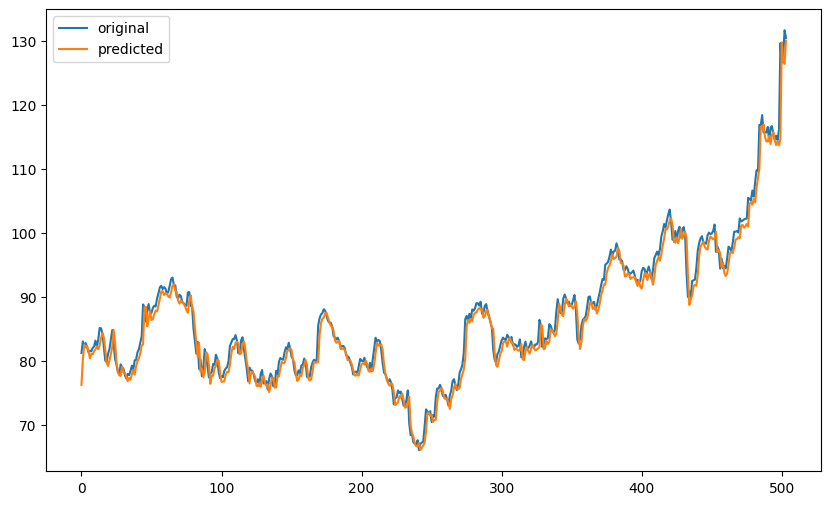

In [285]:
plt.figure(figsize=(10,6))
plt.plot(original_prices_inversed, label = 'original')
plt.plot(predicted_prices_inversed, label = 'predicted')
plt.legend()
plt.show()